In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import statsmodels.api as sm  

In [29]:
cocacola=pd.read_excel("E:/Ravi_ExcelR_Assignments/Forecasting/CocaCola_Sales_Rawdata.xlsx")
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [30]:
cocacola['Month'] = (pd.to_datetime(cocacola['Quarter'].str.split('_').apply(lambda x: ''.join(x[::-1]))))

In [31]:
cocacola

,Quarter,Sales,Month
0,Q1_86,1734.827000,2086-01-01
1,Q2_86,2244.960999,2086-04-01
2,Q3_86,2533.804993,2086-07-01
3,Q4_86,2154.962997,2086-10-01
4,Q1_87,1547.818996,2087-01-01
5,Q2_87,2104.411995,2087-04-01
6,Q3_87,2014.362999,2087-07-01
7,Q4_87,1991.746998,2087-10-01
8,Q1_88,1869.049999,2088-01-01
9,Q2_88,2313.631996,2088-04-01


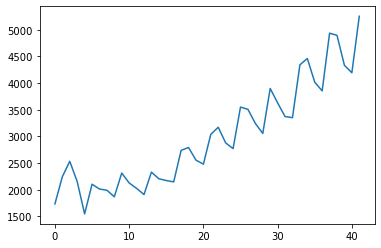

In [32]:
cocacola.Sales.plot() 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EEFE82E5B0>]],
      dtype=object)

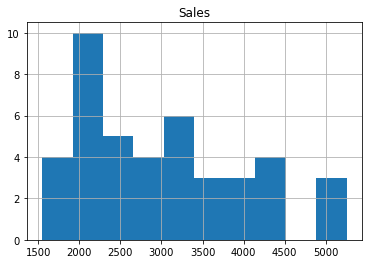

In [33]:
cocacola.hist()

In [34]:
cocacola["month"] = cocacola.Month.dt.strftime("%b") # month extraction
cocacola["year"] = cocacola.Month.dt.strftime("%Y") # year extraction
cocacola

,Quarter,Sales,Month,month,year
0,Q1_86,1734.827000,2086-01-01,Jan,2086
1,Q2_86,2244.960999,2086-04-01,Apr,2086
2,Q3_86,2533.804993,2086-07-01,Jul,2086
3,Q4_86,2154.962997,2086-10-01,Oct,2086
4,Q1_87,1547.818996,2087-01-01,Jan,2087
5,Q2_87,2104.411995,2087-04-01,Apr,2087
6,Q3_87,2014.362999,2087-07-01,Jul,2087
7,Q4_87,1991.746998,2087-10-01,Oct,2087
8,Q1_88,1869.049999,2088-01-01,Jan,2088
9,Q2_88,2313.631996,2088-04-01,Apr,2088


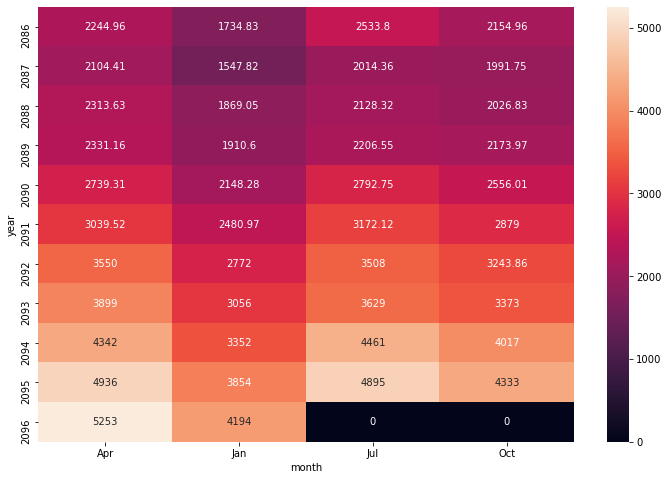

In [35]:
#For Heat Maps
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=cocacola,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

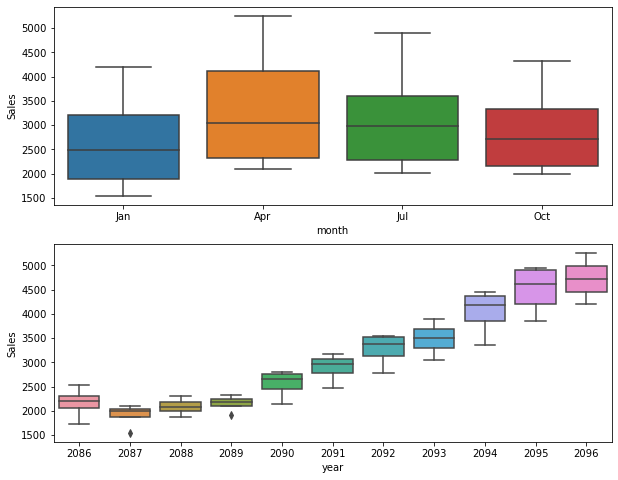

In [36]:
# Boxplot for month and year wise
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=cocacola)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=cocacola)

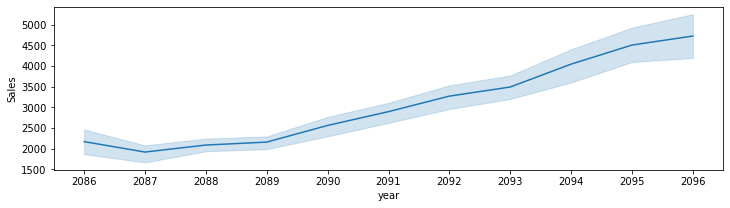

In [37]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=cocacola) 

In [38]:
#filling categorical variable with dummy values
cocacola=pd.get_dummies(cocacola,columns=['month']) 
cocacola 

,Quarter,Sales,Month,year,month_Apr,month_Jan,month_Jul,month_Oct
0,Q1_86,1734.827000,2086-01-01,2086,0,1,0,0
1,Q2_86,2244.960999,2086-04-01,2086,1,0,0,0
2,Q3_86,2533.804993,2086-07-01,2086,0,0,1,0
3,Q4_86,2154.962997,2086-10-01,2086,0,0,0,1
4,Q1_87,1547.818996,2087-01-01,2087,0,1,0,0
5,Q2_87,2104.411995,2087-04-01,2087,1,0,0,0
6,Q3_87,2014.362999,2087-07-01,2087,0,0,1,0
7,Q4_87,1991.746998,2087-10-01,2087,0,0,0,1
8,Q1_88,1869.049999,2088-01-01,2088,0,1,0,0
9,Q2_88,2313.631996,2088-04-01,2088,1,0,0,0


In [39]:
cocacola.columns

Index(['Quarter', 'Sales', 'Month', 'year', 'month_Apr', 'month_Jan',
       'month_Jul', 'month_Oct'],
      dtype='object')

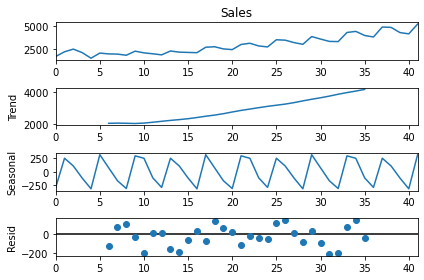

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(cocacola.Sales,period=12)
decompose_ts_add.plot()
plt.show() 

In [41]:
Train = cocacola.head(30)
Test = cocacola.tail(12)  

In [42]:
import statsmodels.formula.api as smf 

In [43]:
#Linear Model
linear_model = smf.ols('Sales~month_Apr',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['month_Apr'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2)) 
rmse_linear

1793.9158756692032

In [44]:
#Exponential

Exp = smf.ols('month_Apr~month_Jan',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['month_Jan'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 

4259.046704943993

In [46]:
#Quadratic 

Quad = smf.ols('Sales~month_Apr+month_Jan',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["month_Apr","month_Jan"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad 

1782.3502951703988

In [47]:
#Additive seasonality 

add_sea = smf.ols('Sales~month_Apr+month_Jan+month_Jul+month_Oct',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month_Apr','month_Jan','month_Jul','month_Oct']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea 

1778.0065467941358

In [48]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
3,rmse_add_sea,1778.006547
2,rmse_Quad,1782.350295
0,rmse_linear,1793.915876
1,rmse_Exp,4259.046705
